In [31]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# Replace 'file_path.csv' with the path to your CSV file
file_path = '/srv/CLAP/roi/BioLingual/output/2024-04-10_23-03-50/predicted_true_values_2024-04-10_23-03-50_0-6_0-4_0_0_filtered_classes_window4.csv'
# CLAP/roi/BioLingual/output/predicted_true_values_2024-02-21_09-30-38.csv
# CLAP/roi/BioLingual/output/predicted_true_values_2024-02-20_21-28-09.csv
# Read the CSV file
df = pd.read_csv(file_path)

# Now you can perform operations on your DataFrame 'df'
# print(df.head())  # Display the first few rows of the DataFrame

split_labels = df['true'].str.split()

# Extract specific elements from the split lists
selected_columns = {
    'ship_type': [label[0] for label in split_labels],
    'distance_category': [label[3] for label in split_labels],
    'speed_category': [label[7] for label in split_labels],
    'activity': [label[9] for label in split_labels]
}

# Create a DataFrame from the selected columns
selected_df = pd.DataFrame(selected_columns)


split_labels_predicted = df['predicted'].str.split()

# Extract specific elements from the split lists
selected_columns_predicted = {
    'ship_type_predicted': [label[0] for label in split_labels_predicted],
    'distance_category_predicted': [label[3] for label in split_labels_predicted],
    'speed_category_predicted': [label[7] for label in split_labels_predicted],
    'activity_predicted': [label[9] for label in split_labels_predicted]
}

# Create a DataFrame from the selected columns
selected_df_predicted = pd.DataFrame(selected_columns_predicted)

In [90]:
class_distribution = selected_df["ship_type"].value_counts()
print(class_distribution)


ship_type
Cargo    1197
Name: count, dtype: int64


In [32]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


In [37]:
selected_df

,ship_type,distance_category,speed_category,activity
0,Cargo,0-1,0-1.5,at-anchor
1,Cargo,0-1,0-1.5,at-anchor
2,Cargo,0-1,0-1.5,at-anchor
3,Cargo,0-1,0-1.5,at-anchor
4,Cargo,0-1,0-1.5,at-anchor


In [40]:
selected_df_predicted["activity_predicted"]

0       underway-using-engine
1       underway-using-engine
2       underway-using-engine
3       underway-using-engine
4       underway-using-engine
                ...          
1192                at-anchor
1193                at-anchor
1194                at-anchor
1195    underway-using-engine
1196                at-anchor
Name: activity_predicted, Length: 1197, dtype: object

Accuracy for ship_type: 1.0


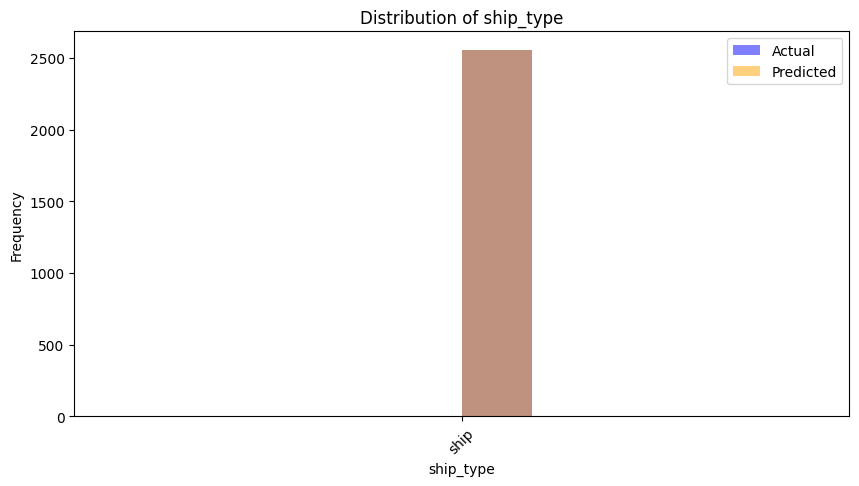

Accuracy for distance_category: 0.2347417840375587


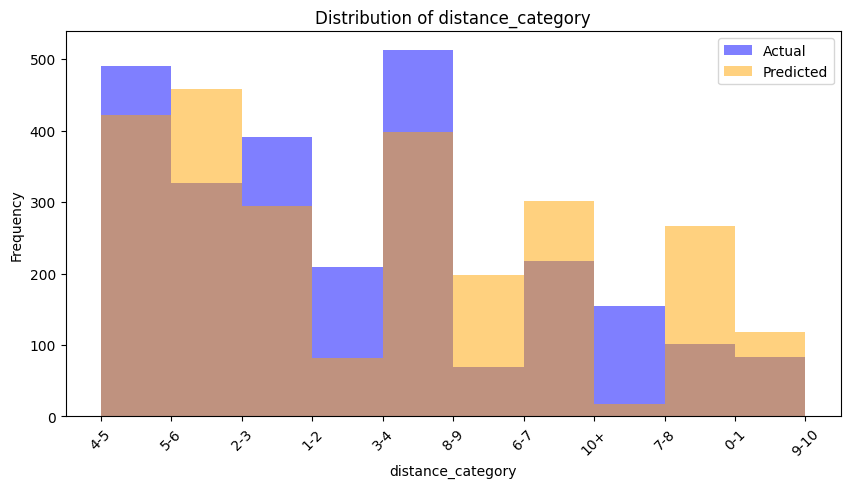

Accuracy for speed_category: 0.3642410015649452


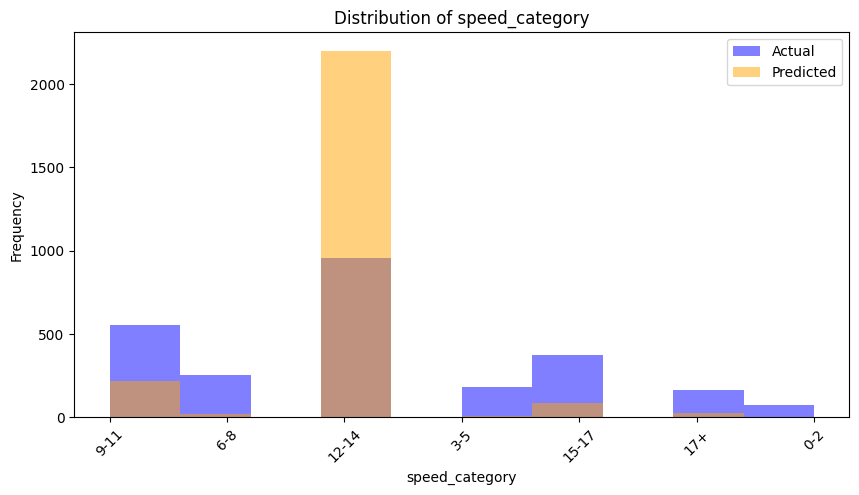

Accuracy for activity: 1.0


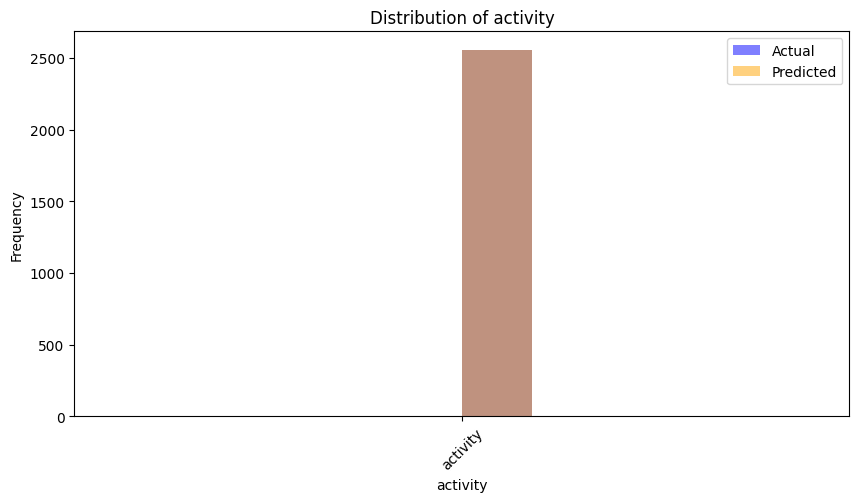

In [33]:
from sklearn.metrics import accuracy_score

# Define the categories
categories = ['ship_type', 'distance_category', 'speed_category', 'activity']

# Calculate accuracy for each category
for category in categories:
    actual_values = selected_df[category]
    predicted_values = selected_df_predicted[category + '_predicted']  # Adjust column name for predicted values
    
    accuracy = accuracy_score(actual_values, predicted_values)
    
    print(f"Accuracy for {category}: {accuracy}")

    # Create histograms for actual and predicted values
    plt.figure(figsize=(10, 5))
    plt.hist(actual_values, alpha=0.5, label='Actual', color='blue', align='mid')
    plt.hist(predicted_values, alpha=0.5, label='Predicted', color='orange', align='mid')
    plt.xlabel(category)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


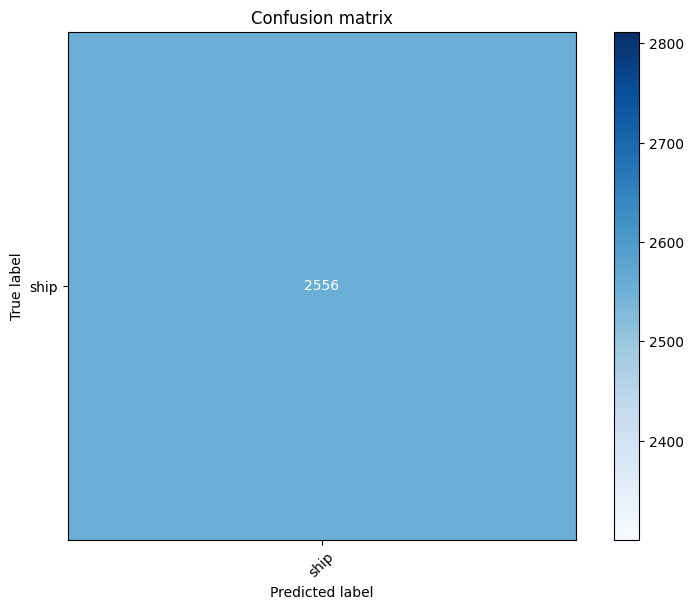

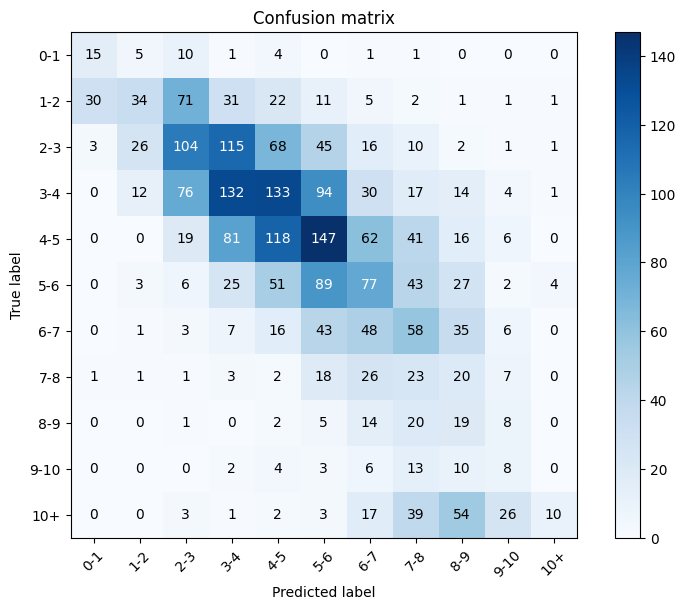

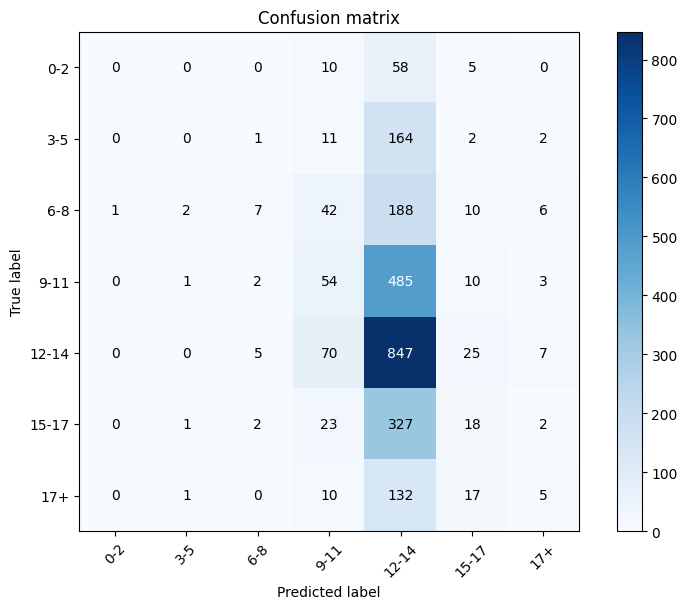

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


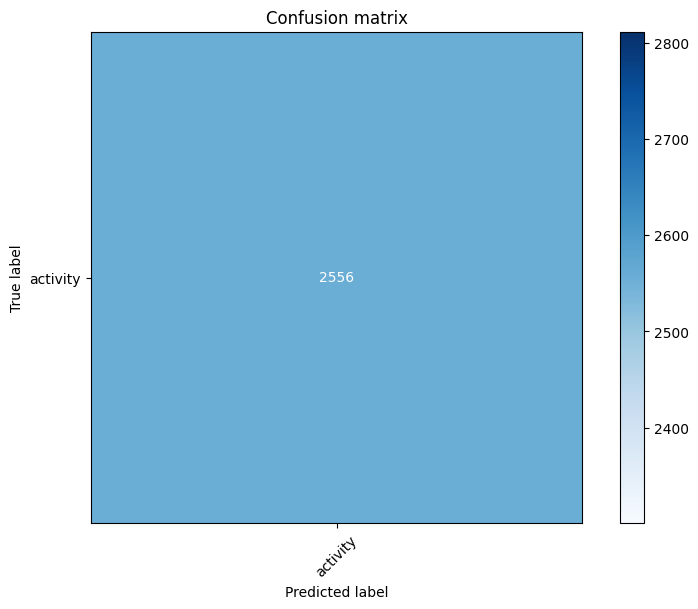

In [34]:
# Define the plot_confusion_matrix function
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Calculate confusion matrix for each category
for category in categories:
    actual_values = selected_df[category]
    predicted_values = selected_df_predicted[category + '_predicted']  # Adjust column name for predicted values
    
    # Compute confusion matrix
    labels=sorted(set(actual_values) | set(predicted_values))
    if category=="speed_category":
        labels.sort(key=lambda x: float(x.split('-')[0]) if x != '17+' else float('inf'))
    if category=="distance_category":
        labels.sort(key=lambda x: float(x.split('-')[0]) if x != '10+' else float('inf'))
    cm = confusion_matrix(actual_values, predicted_values, labels=labels)


    plot_confusion_matrix(cm, classes=labels)


In [77]:
data=sorted(set(actual_values) | set(predicted_values))
data.sort(key=lambda x: float(x.split('-')[0]) if x != '10+' else float('inf'))
data

['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10+']

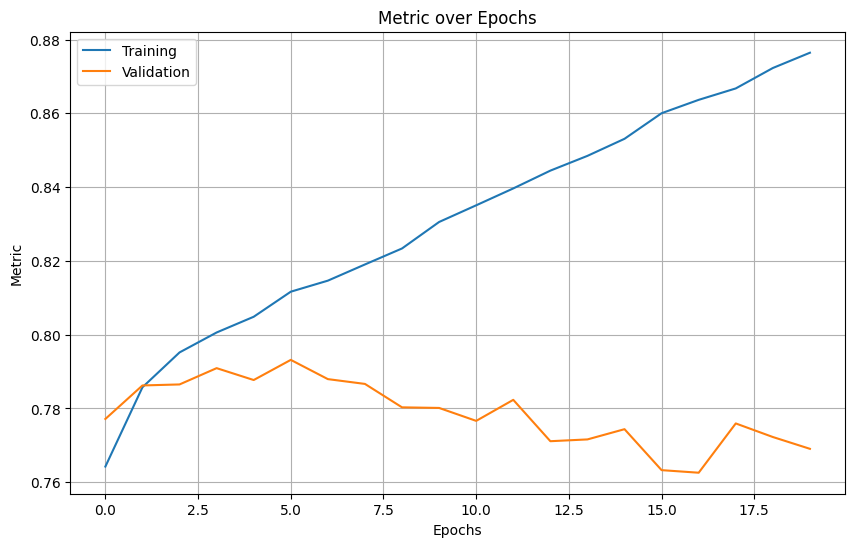

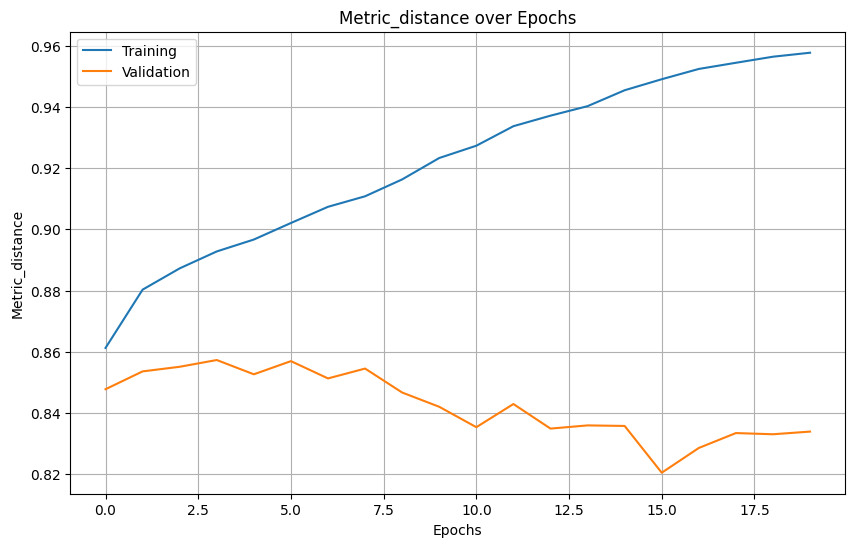

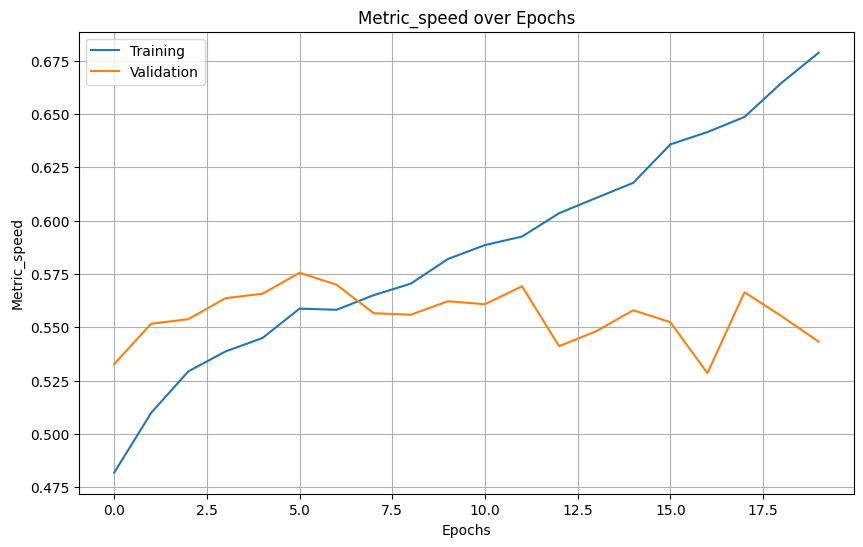

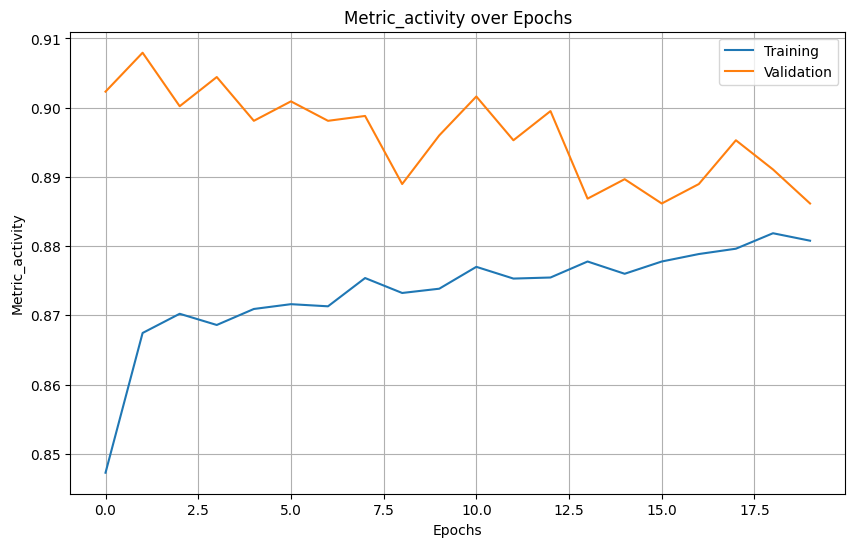

In [19]:
import json
import matplotlib.pyplot as plt

# Open the log file and read its contents
with open('/srv/CLAP/roi/BioLingual/logs_0-6_0-25_0-15_0_filtered_classes.log', 'r') as file:
    lines = file.readlines()


# Initialize lists to store metrics
train_metrics = {'metric': [], 'metric_distance': [], 'metric_speed': [], 'metric_activity': []}
valid_metrics = {'metric': [], 'metric_distance': [], 'metric_speed': [], 'metric_activity': []}
test_metrics = {'metric': [], 'metric_distance': [], 'metric_speed': [], 'metric_activity': []}

# Parse JSON entries and extract metrics
for line in lines[1:-1]:
    entry = json.loads(line)
    train = entry['train']
    valid = entry['valid']
    # test = entry['test']

    for key in train_metrics.keys():
        train_metrics[key].append(train[key])
        valid_metrics[key].append(valid[key])
        # test_metrics[key].append(test[key])

# Extract metric values for plotting
epochs = list(range(len(train_metrics['metric'])))  # Assuming all metrics have the same length
metrics_to_plot = train_metrics.keys()


# Extract metric values for plotting
epochs = list(range(len(train_metrics['metric'])))  # Assuming all metrics have the same length
metrics_categories = ['metric', 'metric_distance', 'metric_speed', 'metric_activity']

# Plotting each metric category in a separate figure
for category in metrics_categories:
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_metrics[category], label='Training')
    plt.plot(epochs, valid_metrics[category], label='Validation')
    # plt.plot(epochs, test_metrics[category], label='Test')

    plt.title(f'{category.capitalize()} over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(category.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
lines[2]['train']

TypeError: string indices must be integers

In [45]:
string_value = '10+'
numeric_part = ''.join(filter(str.isdigit, distance_i.split('-')[0]))
integer_value = int(numeric_part)
print(integer_value)


10


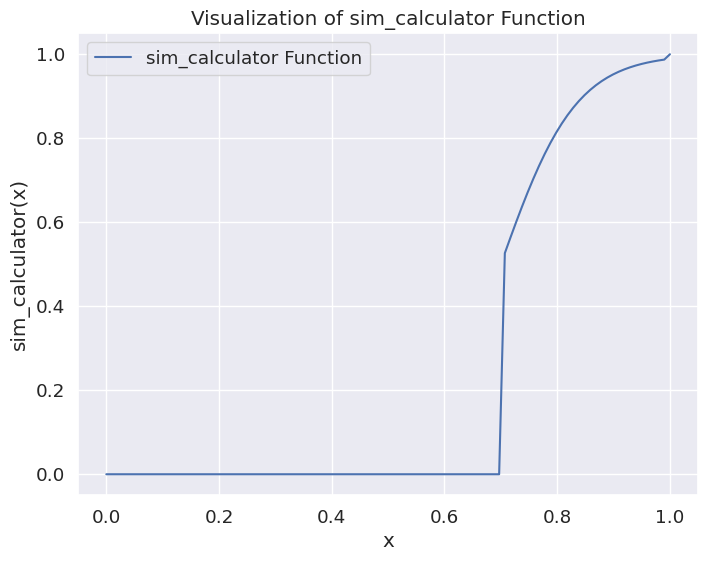

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Define the custom sigmoid function
def custom_sigmoid(x, a, b):
    return 1 / (1 + np.exp(-a * (x - b)))

# Define the sim_calculator function
def sim_calculator(x):
    a = 15  # Adjust this parameter to control the steepness of the curve
    b = 0.7
    if x < 0.7:
        return 0
    elif x == 1:
        return 1
    else:
        return custom_sigmoid(x, a, b)

# Generate x values
x_values = np.linspace(0, 1, 100)  # Generate 100 values from 0 to 2

# Generate y values using the sim_calculator function
y_values = [sim_calculator(x) for x in x_values]

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='sim_calculator Function')
plt.title('Visualization of sim_calculator Function')
plt.xlabel('x')
plt.ylabel('sim_calculator(x)')
plt.grid(True)
plt.legend()
plt.show()


In [52]:
import math
def distance_similarity(distance_i, distance_j):
    """
    Calculate the similarity between two distances.
    """
    similarity = 1 - abs(distance_i - distance_j) / 10
    similarity = sim_calculator(similarity)
    return similarity

# Assuming distance_str_cleaned and distance_str_predicted_cleaned are lists of cleaned distance strings
# where '+' is removed and split('-')[0] is used to get the distance
distance_similarities = []
distances_real=[]
distances_predicted=[]
# Iterate over corresponding distance values from both normal and predicted data
for distance_i, distance_j in zip(selected_df["distance_category"], selected_df_predicted["distance_category_predicted"]):
    distance_i = int(''.join(filter(str.isdigit, distance_i.split('-')[0])))
    distance_j = int(''.join(filter(str.isdigit, distance_j.split('-')[0])))
    distances_real.append(distance_i)
    distances_predicted.append(distance_j)
    similarity = distance_similarity(distance_i, distance_j)
    distance_similarities.append(similarity)

print("mean: ", np.mean(distance_similarities))

mean:  0.8643227978821627


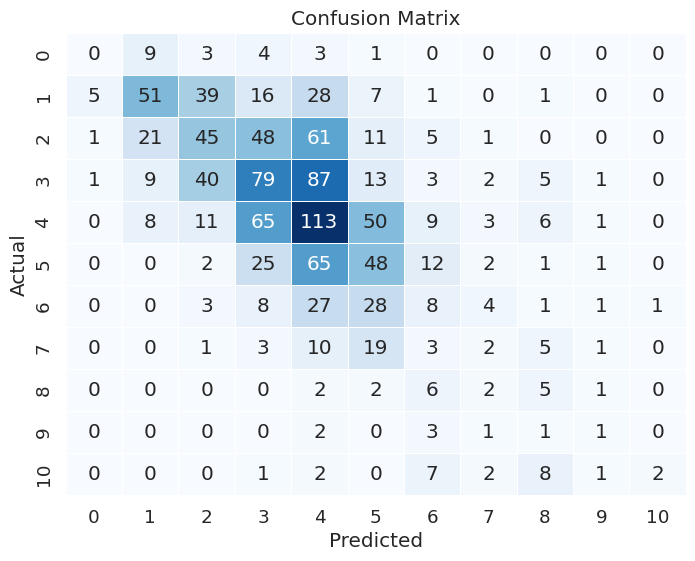

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd



# Determine the unique classes
classes = sorted(set(distances_real + distances_predicted))

# Create the confusion matrix
conf_matrix = confusion_matrix(distances_real, distances_predicted, labels=classes)

# Convert confusion matrix to DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrix_df, annot=True, cmap="Blues", fmt="d", linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [53]:
from sklearn.metrics import confusion_matrix

# Example lists (distances_real and distances_predicted)


# Determine the unique classes
classes = sorted(set(distances_real + distances_predicted))

# Create the confusion matrix
conf_matrix = confusion_matrix(distances_real, distances_predicted, labels=classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  0   9   3   4   3   1   0   0   0   0   0]
 [  5  51  39  16  28   7   1   0   1   0   0]
 [  1  21  45  48  61  11   5   1   0   0   0]
 [  1   9  40  79  87  13   3   2   5   1   0]
 [  0   8  11  65 113  50   9   3   6   1   0]
 [  0   0   2  25  65  48  12   2   1   1   0]
 [  0   0   3   8  27  28   8   4   1   1   1]
 [  0   0   1   3  10  19   3   2   5   1   0]
 [  0   0   0   0   2   2   6   2   5   1   0]
 [  0   0   0   0   2   0   3   1   1   1   0]
 [  0   0   0   1   2   0   7   2   8   1   2]]


In [49]:
distances_real

[5,
 1,
 2,
 4,
 2,
 3,
 2,
 2,
 4,
 1,
 1,
 3,
 3,
 4,
 4,
 5,
 2,
 2,
 5,
 3,
 4,
 0,
 1,
 5,
 2,
 3,
 4,
 6,
 3,
 3,
 6,
 5,
 3,
 4,
 0,
 3,
 1,
 1,
 4,
 6,
 10,
 10,
 2,
 4,
 5,
 10,
 3,
 4,
 2,
 7,
 4,
 4,
 5,
 3,
 4,
 8,
 2,
 9,
 2,
 4,
 2,
 4,
 3,
 3,
 1,
 0,
 6,
 1,
 5,
 1,
 6,
 2,
 4,
 3,
 6,
 4,
 3,
 1,
 1,
 8,
 6,
 4,
 3,
 5,
 7,
 0,
 4,
 4,
 3,
 1,
 3,
 5,
 7,
 8,
 4,
 4,
 3,
 9,
 4,
 2,
 4,
 7,
 3,
 6,
 1,
 3,
 4,
 4,
 2,
 2,
 4,
 7,
 5,
 5,
 2,
 6,
 4,
 5,
 7,
 3,
 6,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 3,
 2,
 7,
 4,
 3,
 4,
 2,
 4,
 1,
 2,
 6,
 2,
 2,
 2,
 1,
 4,
 7,
 4,
 4,
 4,
 5,
 5,
 2,
 7,
 7,
 3,
 1,
 4,
 5,
 5,
 2,
 3,
 2,
 2,
 6,
 3,
 3,
 5,
 1,
 2,
 10,
 3,
 5,
 6,
 5,
 4,
 8,
 6,
 7,
 2,
 4,
 1,
 4,
 3,
 2,
 4,
 3,
 1,
 6,
 3,
 1,
 10,
 2,
 4,
 3,
 5,
 4,
 3,
 3,
 3,
 3,
 4,
 2,
 2,
 3,
 1,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 2,
 4,
 7,
 3,
 7,
 3,
 5,
 2,
 1,
 3,
 5,
 3,
 3,
 2,
 6,
 5,
 3,
 5,
 6,
 1,
 10,
 5,
 2,
 1,
 4,
 4,
 3,
 1,
 2,
 2,
 1,
 3,
 2,
 3,
 6,
 5,
 3

In [23]:
def custom_sigmoid(x, a, b):
    """
    Custom sigmoid function with parameters a and b
    Returns a value between 0 and 1.
    """

    return 1 / (1 + math.exp(-a * (x - b)))

def sim_calculator(x):
# for x in input_values:
    a = 15  # Adjust this parameter to control the steepness of the curve
    b = 0.7
    if x < 0.7:
        return 0
    elif x==1:
        return 1
    else:
        return custom_sigmoid(x, a, b)




In [18]:
import numpy as np
np.unique(selected_df_predicted["speed_category_predicted"])

array(['13.3+', '8.2-13.3'], dtype=object)

In [9]:
 df['true']

0    Cargo at distance 0-1 km with speed 0-1.5 is a...
1    Cargo at distance 0-1 km with speed 0-1.5 is a...
2    Cargo at distance 0-1 km with speed 0-1.5 is a...
3    Cargo at distance 0-1 km with speed 0-1.5 is a...
4    Cargo at distance 0-1 km with speed 0-1.5 is a...
Name: true, dtype: object

In [11]:
split_labels = df['true'].str.split()

# Extract specific elements from the split lists
selected_columns = {
    'ship_type': [label[0] for label in split_labels],
    'distance_category': [label[3] for label in split_labels],
    'speed_category': [label[7] for label in split_labels],
    'activity': [label[9] for label in split_labels]
}

# Create a DataFrame from the selected columns
selected_df = pd.DataFrame(selected_columns)

In [12]:
selected_df

,ship_type,distance_category,speed_category,activity
0,Cargo,0-1,0-1.5,at-anchor
1,Cargo,0-1,0-1.5,at-anchor
2,Cargo,0-1,0-1.5,at-anchor
3,Cargo,0-1,0-1.5,at-anchor
4,Cargo,0-1,0-1.5,at-anchor


In [7]:
# Split the 'label' column by spaces and select specific indices
split_labels = df['true'].str.split().apply(lambda x: [x[i] for i in [0, 3, 6, 8]])

# Create a DataFrame from the selected columns and name the columns
selected_df = pd.DataFrame(split_labels, columns=['ship_type', 'distance_category', 'speed_category', 'activity'])


In [8]:
selected_df

,ship_type,distance_category,speed_category,activity


In [ ]:
import pandas as pd


df = pd.DataFrame(data)

# Split the components of the label and predicted columns
label_components = df['true'].apply(lambda x: ' '.join(x.split()[0:4]))
predicted_components = df['predicted'].apply(lambda x: ' '.join(x.split()[0:4]))

# Calculate performance metrics for each component
correct = (label_components == predicted_components).sum()
total = len(label_components)
accuracy = correct / total

# Print performance metrics
print(f"Correct: {correct}")
print(f"Total: {total}")
print(f"Accuracy: {accuracy:.2%}")
